<a href="https://colab.research.google.com/github/LadanTazik/COSC520/blob/main/COSC520_Assignemnt2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

For the implementation;
- KD-Tree and Ball Tree: Built using scikit-learn’s efficient implementations.
- Locality Sensitive Hashing, implementation of this were adopted from [A Github repo for LSH](https://github.com/dougian/lsh/tree/master)

and I generate synthetic datasets for several combinations of $n$ (data points) and $d$ (dimensiality of each data), build each data structure and report the average time of 100 queries.

#### Running Instruction:
1. Import the libraries,
2. Run the code to define the evaluation parameters
2. Run the benchmarking for KD tree and generate evaluation plots
2. Run the benchmarking for Ball tree and generate evaluation plots
3. Run the implementation of LSH
4. Run the Benchmark function to evaluate LSH
6. Generate the plots for LSH
7. Unit tests

In [ ]:
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.neighbors import KDTree, BallTree
from copy import copy
from itertools import combinations
from pandas import DataFrame
from sklearn.metrics.pairwise import pairwise_distances

In [ ]:
dims = [8, 32, 64, 128,256]         # Varying number of dimensions
sizes = [100000, 500000, 1000000]  # Varying dataset sizes
n_queries = 100
k = 5  # Number of nearest neighbors

 ## 1. KD Tree implementation and evaluation

In [ ]:
# ----------------------------------------
# Benchmark for KD-Tree
# ----------------------------------------
def benchmark_kdtree(sizes_, dims_, n_queries_, k_):

  """
  Parameters:
      sizes_ (list of int): List of dataset sizes (number of points).
      dims_ (list of int): List of dimensions to test.
      n_queries_ (int): Number of queries to average over.
      k_ (int): Number of nearest neighbors.

  Returns:
      kd_build_times (dict): Dictionary mapping dataset size to list of build times for each dimension.
      kd_query_times (dict): Dictionary mapping dataset size to list of query times for each dimension.
    """
  sizes = sizes_.copy()
  dims = dims_.copy()
  n_queries = n_queries_
  k = k_

  kd_build_times = {n: [] for n in sizes}
  kd_query_times = {n: [] for n in sizes}

  for n in sizes:
    print(f"\nKD-Tree: Dataset size: {n}")
    for d in dims:
      print(f"  Dimensions: {d}")
      data = np.random.rand(n, d)
      query_point = np.random.rand(1, d)

      # Build KD-Tree and measure time
      start = time.time()
      kd_tree = KDTree(data, leaf_size=40)
      build_time = time.time() - start
      kd_build_times[n].append(build_time)

      # Average query time over n_queries
      query_times = []
      for _ in range(n_queries):
        start = time.time()
        kd_tree.query(query_point, k=k)
        query_times.append(time.time() - start)
      kd_query_times[n].append(np.mean(query_times))

  return kd_build_times, kd_query_times


In [ ]:
kd_build_times, kd_query_times = benchmark_kdtree(sizes, dims, n_queries, k)


KD-Tree: Dataset size: 100000
  Dimensions: 8
  Dimensions: 32
  Dimensions: 64
  Dimensions: 128
  Dimensions: 256

KD-Tree: Dataset size: 500000
  Dimensions: 8
  Dimensions: 32
  Dimensions: 64
  Dimensions: 128
  Dimensions: 256

KD-Tree: Dataset size: 1000000
  Dimensions: 8
  Dimensions: 32
  Dimensions: 64
  Dimensions: 128
  Dimensions: 256


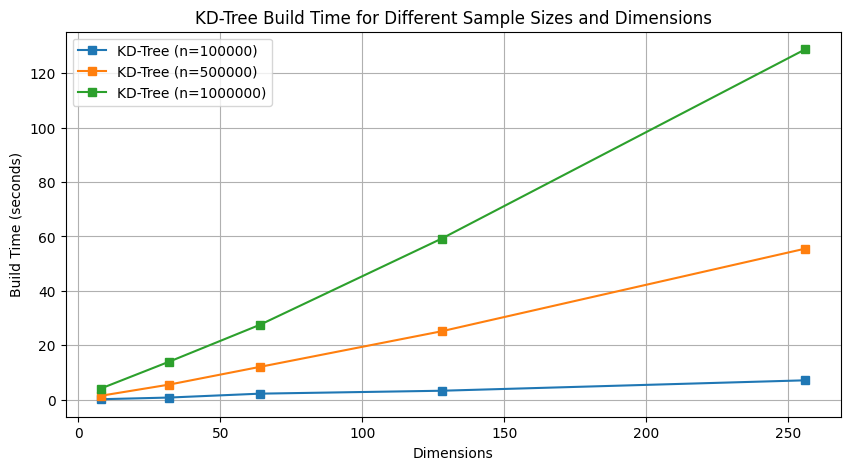

In [ ]:
plt.figure(figsize=(10, 5))
for n in sizes:
  plt.plot(dims, kd_build_times[n], marker='s', label=f'KD-Tree (n={n})')
plt.xlabel("Dimensions")
plt.ylabel("Build Time (seconds)")
plt.title("KD-Tree Build Time for Different Sample Sizes and Dimensions")
plt.legend()
plt.grid(True)
#plt.savefig("kd_build_time_vs_dims.png")
plt.show()

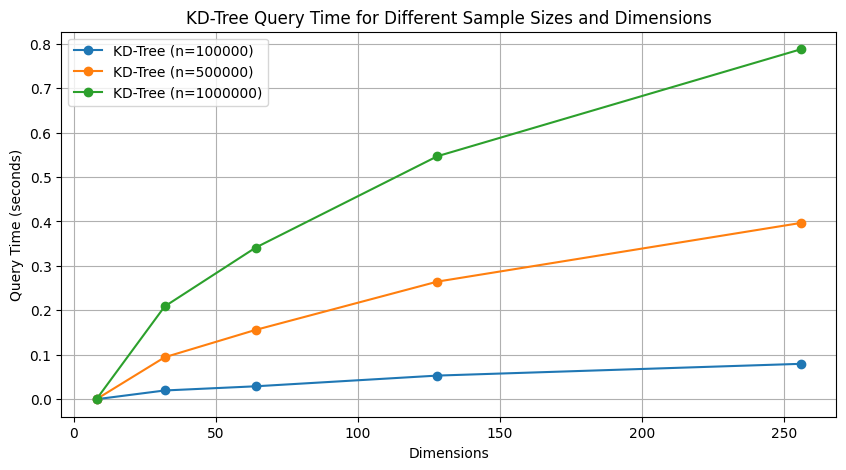

In [ ]:
plt.figure(figsize=(10, 5))
for n in sizes:
  plt.plot(dims, kd_query_times[n], marker='o', label=f'KD-Tree (n={n})')
plt.xlabel("Dimensions")
plt.ylabel("Query Time (seconds)")
plt.title("KD-Tree Query Time for Different Sample Sizes and Dimensions")
plt.legend()
plt.grid(True)
#plt.savefig("kd_build_time_vs_dims.png")
plt.show()

## 2. Implementaion of Ball Tree and Evaluation

In [ ]:
def benchmark_balltree(sizes_, dims_, n_queries_, k_):
    """
    Parameters:
      sizes_ (list of int): List of dataset sizes.
      dims_ (list of int): List of dimensions to test.
      n_queries_ (int): Number of queries to average over.
      k_ (int): Number of nearest neighbors.

    Returns:
      ball_build_times (dict): Mapping dataset size to list of build times (per dimension).
      ball_query_times (dict): Mapping dataset size to list of query times (per dimension).
    """
    sizes = sizes_.copy()
    dims = dims_.copy()
    n_queries = n_queries_
    k = k_

    ball_build_times = {n: [] for n in sizes}
    ball_query_times = {n: [] for n in sizes}

    for n in sizes:
        print(f"\nBall Tree: Dataset size: {n}")
        for d in dims:
            print(f"  Dimensions: {d}")
            data = np.random.rand(n, d)
            query_point = np.random.rand(1, d)

            # Build Ball Tree and record build time
            start = time.time()
            ball_tree = BallTree(data, leaf_size=40)
            build_time = time.time() - start
            ball_build_times[n].append(build_time)

            # Record average query time over n_queries
            query_times = []
            for _ in range(n_queries):
                start = time.time()
                ball_tree.query(query_point, k=k)
                query_times.append(time.time() - start)
            ball_query_times[n].append(np.mean(query_times))

    return ball_build_times, ball_query_times


In [ ]:
ball_build_times, ball_query_times = benchmark_balltree(sizes, dims, n_queries, k)


Ball Tree: Dataset size: 100000
  Dimensions: 8
  Dimensions: 32
  Dimensions: 64
  Dimensions: 128
  Dimensions: 256

Ball Tree: Dataset size: 500000
  Dimensions: 8
  Dimensions: 32
  Dimensions: 64
  Dimensions: 128
  Dimensions: 256

Ball Tree: Dataset size: 1000000
  Dimensions: 8
  Dimensions: 32
  Dimensions: 64
  Dimensions: 128
  Dimensions: 256


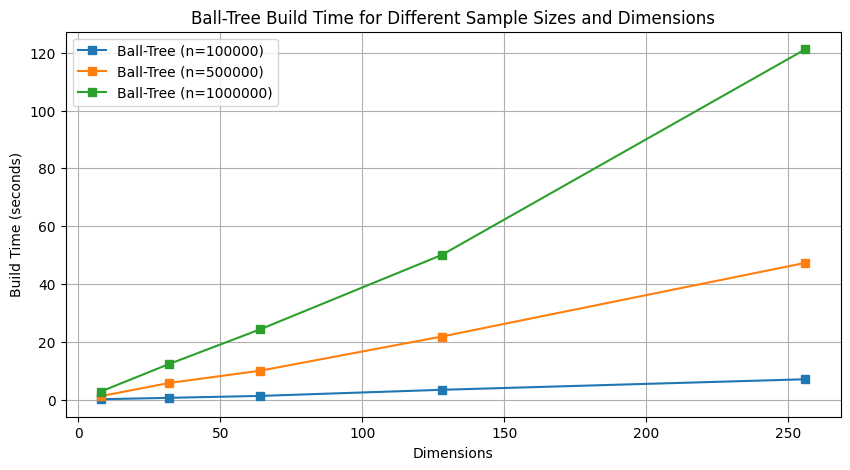

In [ ]:
plt.figure(figsize=(10, 5))
for n in sizes:
  plt.plot(dims, ball_build_times[n], marker='s', label=f'Ball-Tree (n={n})')
plt.xlabel("Dimensions")
plt.ylabel("Build Time (seconds)")
plt.title("Ball-Tree Build Time for Different Sample Sizes and Dimensions")
plt.legend()
plt.grid(True)
plt.show()

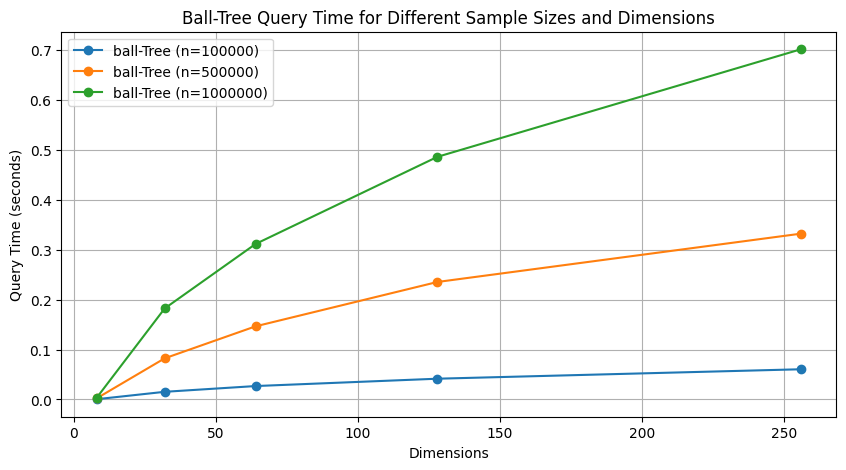

In [ ]:
plt.figure(figsize=(10, 5))
for n in sizes:
  plt.plot(dims, ball_query_times[n], marker='o', label=f'ball-Tree (n={n})')
plt.xlabel("Dimensions")
plt.ylabel("Query Time (seconds)")
plt.title("Ball-Tree Query Time for Different Sample Sizes and Dimensions")
plt.legend()
plt.grid(True)
plt.show()

##3. Implementation and Evaluation of LSH

In [ ]:
class LSH:
    def __init__(self, data):
        self.data = data
        self.model = None

    def __generate_random_vectors(self, num_vector, dim):
        return np.random.randn(dim, num_vector)

    def train(self, num_vector, seed=None):
        dim = self.data.shape[1]
        if seed is not None:
            np.random.seed(seed)

        random_vectors = self.__generate_random_vectors(num_vector, dim)
        powers_of_two = 1 << np.arange(num_vector - 1, -1, -1)

        table = {}

        # Partition data points into bins
        bin_index_bits = (self.data.dot(random_vectors) >= 0)

        # Encode bin index bits into integers
        bin_indices = bin_index_bits.dot(powers_of_two)

        # Update table so that table[i] is the list of document ids with bin index equal to i.
        for data_index, bin_index in enumerate(bin_indices):
            if bin_index not in table:
                # If no list yet exists for this bin, assign the bin an empty list.
                table[bin_index] = []
            # Fetch the list of document ids associated with the bin and add the document id to the end.
            table[bin_index].append(data_index)

        self.model = {'bin_indices': bin_indices, 'table': table,
                      'random_vectors': random_vectors, 'num_vector': num_vector}
        return self

    def __search_nearby_bins(self, query_bin_bits, table, search_radius=2, initial_candidates=set()):
        num_vector = self.model['num_vector']
        powers_of_two = 1 << np.arange(num_vector - 1, -1, -1)

        # Allow the user to provide an initial set of candidates.
        candidate_set = copy(initial_candidates)

        for different_bits in combinations(range(num_vector), search_radius):
            alternate_bits = copy(query_bin_bits)
            for i in different_bits:
                alternate_bits[i] = 1 if alternate_bits[i] == 0 else 0

            # Convert the new bit vector to an integer index
            nearby_bin = alternate_bits.dot(powers_of_two)

            # Fetch the list of documents belonging to the bin indexed by the new bit vector.
            # Then add those documents to candidate_set
            if nearby_bin in table:
                candidate_set.update(table[nearby_bin])

        return candidate_set

    def query(self, query_vec, k, max_search_radius, initial_candidates=set()):

        if not self.model:
            print('Model not yet build. Exiting!')
            exit(-1)

        data = self.data
        table = self.model['table']
        random_vectors = self.model['random_vectors']

        bin_index_bits = (query_vec.dot(random_vectors) >= 0).flatten()

        candidate_set = set()
        # Search nearby bins and collect candidates
        for search_radius in list(range(max_search_radius + 1)):
            candidate_set = self.__search_nearby_bins(bin_index_bits, table,
                                                      search_radius, initial_candidates=initial_candidates)
        # Sort candidates by their true distances from the query
        nearest_neighbors = DataFrame({'id': list(candidate_set)})
        candidates = data[np.array(list(candidate_set)), :]
        nearest_neighbors['distance'] = pairwise_distances(candidates, query_vec, metric='euclidean').flatten()

        return nearest_neighbors.nsmallest(k, 'distance')

In [ ]:
def benchmark_lsh(sizes_, dims_, n_queries_, k_, num_vector=10, max_search_radius=2):
    """
    Benchmark the provided LSH implementation over various dataset sizes and dimensions.

    Parameters:
      sizes_ (list of int): List of dataset sizes (number of points).
      dims_ (list of int): List of dimensions to test.
      n_queries_ (int): Number of queries to average over.
      k_ (int): Number of nearest neighbors to return.
      num_vector (int): Number of random vectors (hash functions) to use in training.
      max_search_radius (int): Maximum search radius used in query (number of bit flips).

    Returns:
      lsh_build_times (dict): Mapping from dataset size to list of build times (per dimension).
      lsh_query_times (dict): Mapping from dataset size to list of average query times (per dimension).
    """
    sizes = sizes_.copy()
    dims = dims_.copy()
    n_queries = n_queries_
    k = k_

    lsh_build_times = {n: [] for n in sizes}
    lsh_query_times = {n: [] for n in sizes}

    for n in sizes:
        print(f"\nLSH: Dataset size: {n}")
        for d in dims:
            print(f"  Dimensions: {d}")
            # Generate synthetic data and a random query vector.
            data = np.random.rand(n, d)
            query_vec = np.random.rand(1, d)  # shape (1, d)

            # Build the LSH model and record build time.
            start = time.time()
            lsh_model = LSH(data).train(num_vector=num_vector)
            build_time = time.time() - start
            lsh_build_times[n].append(build_time)

            # Measure average query time over n_queries queries.
            query_times = []
            for _ in range(n_queries):
                start = time.time()
                lsh_model.query(query_vec, k, max_search_radius)
                query_times.append(time.time() - start)
            lsh_query_times[n].append(np.mean(query_times))

    return lsh_build_times, lsh_query_times

In [ ]:
num_vector = 10
max_search_radius = 2
k_=5
lsh_build, lsh_query = benchmark_lsh(sizes, dims, n_queries, k, num_vector, max_search_radius)


LSH: Dataset size: 100000
  Dimensions: 8
  Dimensions: 32
  Dimensions: 64
  Dimensions: 128
  Dimensions: 256

LSH: Dataset size: 500000
  Dimensions: 8
  Dimensions: 32
  Dimensions: 64
  Dimensions: 128
  Dimensions: 256

LSH: Dataset size: 1000000
  Dimensions: 8
  Dimensions: 32
  Dimensions: 64
  Dimensions: 128
  Dimensions: 256


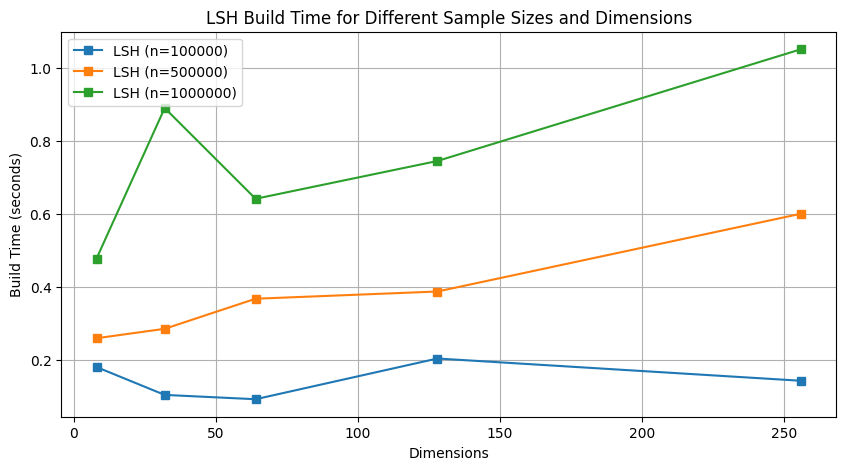

In [ ]:
plt.figure(figsize=(10, 5))
for n in sizes:
  plt.plot(dims, lsh_build[n], marker='s', label=f'LSH (n={n})')
plt.xlabel("Dimensions")
plt.ylabel("Build Time (seconds)")
plt.title("LSH Build Time for Different Sample Sizes and Dimensions")
plt.legend()
plt.grid(True)
plt.show()

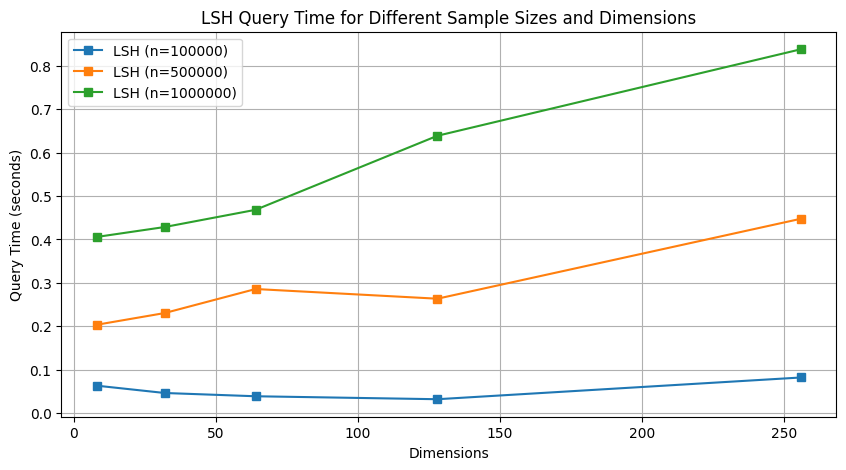

In [ ]:
plt.figure(figsize=(10, 5))
for n in sizes:
  plt.plot(dims, lsh_query[n], marker='s', label=f'LSH (n={n})')
plt.xlabel("Dimensions")
plt.ylabel("Query Time (seconds)")
plt.title("LSH Query Time for Different Sample Sizes and Dimensions")
plt.legend()
plt.grid(True)
plt.show()

## 4. Unit Tests

Here is a unit test suite using Python’s unittest framework. The tests ensure that:

- Dataset Initialization: The class correctly initializes with data.
- Training Method: The LSH model is built successfully.
- Hashing Consistency: The same data should hash to the same bin indices if no - randomness is involved.
- Query Execution: The query function returns k nearest neighbors.
- Edge Cases: Handles queries when no candidates are found.

In [ ]:
import unittest
from itertools import combinations

# ------------------------------
# Unit Test Class for LSH, KD Tree, and Ball Tree
# ------------------------------
class TestNearestNeighborMethods(unittest.TestCase):

    def setUp(self):
        """
        Set up a synthetic dataset for testing.
        """
        np.random.seed(42)  # For reproducibility
        self.data = np.random.randn(100, 8)  # 100 points in 8D space
        self.query_point = np.random.randn(1, 8)  # Single query point
        self.num_vector = 5  # Number of hash functions
        self.lsh = LSH(self.data)
        self.kd_tree = KDTree(self.data)
        self.ball_tree = BallTree(self.data)

    # -------------------
    # LSH Tests
    # -------------------
    def test_lsh_initialization(self):
        """Test if LSH initializes correctly."""
        self.assertEqual(self.lsh.data.shape, (100, 8))
        self.assertIsNone(self.lsh.model)

    def test_lsh_train(self):
        """Test if the LSH model builds correctly."""
        self.lsh.train(num_vector=self.num_vector)
        self.assertIsNotNone(self.lsh.model)
        self.assertIn('bin_indices', self.lsh.model)
        self.assertIn('table', self.lsh.model)

    def test_lsh_query_k_results(self):
        """Test if LSH returns k nearest neighbors."""
        self.lsh.train(num_vector=self.num_vector)
        k = 3
        results = self.lsh.query(self.query_point, k=k, max_search_radius=2)
        self.assertEqual(len(results), k)

    def test_lsh_query_no_candidates(self):
        """Test LSH when no candidates are found."""
        self.lsh.train(num_vector=self.num_vector)
        distant_query = np.random.randn(1, 8) * 1000  # Extremely far query
        results = self.lsh.query(distant_query, k=3, max_search_radius=0)
        self.assertGreaterEqual(len(results), 0)  # Should return empty or fallback

    # -------------------
    # KD Tree Tests
    # -------------------
    def test_kd_tree_build(self):
        """Test if KD Tree builds successfully."""
        self.assertIsInstance(self.kd_tree, KDTree)

    def test_kd_tree_query_k_results(self):
        """Test if KD Tree returns k nearest neighbors."""
        k = 3
        distances, indices = self.kd_tree.query(self.query_point, k=k)
        self.assertEqual(len(indices[0]), k)

    # -------------------
    # Ball Tree Tests
    # -------------------
    def test_ball_tree_build(self):
        """Test if Ball Tree builds successfully."""
        self.assertIsInstance(self.ball_tree, BallTree)

    def test_ball_tree_query_k_results(self):
        """Test if Ball Tree returns k nearest neighbors."""
        k = 3
        distances, indices = self.ball_tree.query(self.query_point, k=k)
        self.assertEqual(len(indices[0]), k)

    # -------------------
    # Comparison Tests
    # -------------------
    def test_kd_vs_ball_tree_consistency(self):
        """Test if KD Tree and Ball Tree return similar neighbors."""
        k = 3
        kd_dists, kd_indices = self.kd_tree.query(self.query_point, k=k)
        ball_dists, ball_indices = self.ball_tree.query(self.query_point, k=k)

        # Ensure at least one neighbor matches
        self.assertTrue(np.any(np.isin(kd_indices, ball_indices)))



What does each method does?
- test_lsh_initialization:	Ensures LSH initializes correctly.
- test_lsh_train:	Ensures LSH builds an index.
- test_lsh_query_k_results:	Ensures LSH returns k nearest neighbors.
- test_lsh_query_no_candidates:	Ensures LSH handles cases where no candidates exist.
- test_kd_tree_build:	Ensures KD Tree is initialized properly.
- test_kd_tree_query_k_results:	Ensures KD Tree returns k nearest neighbors.
- test_ball_tree_build:	Ensures Ball Tree is initialized properly.
- test_ball_tree_query_k_results:	Ensures Ball Tree returns k nearest neighbors.
- test_kd_vs_ball_tree_consistency:	Ensures KD and Ball Tree give similar results.

In [ ]:
unittest.main(argv=[''], verbosity=2, exit=False)

test_ball_tree_build (__main__.TestNearestNeighborMethods.test_ball_tree_build)
Test if Ball Tree builds successfully. ... ok
test_ball_tree_query_k_results (__main__.TestNearestNeighborMethods.test_ball_tree_query_k_results)
Test if Ball Tree returns k nearest neighbors. ... ok
test_kd_tree_build (__main__.TestNearestNeighborMethods.test_kd_tree_build)
Test if KD Tree builds successfully. ... ok
test_kd_tree_query_k_results (__main__.TestNearestNeighborMethods.test_kd_tree_query_k_results)
Test if KD Tree returns k nearest neighbors. ... ok
test_kd_vs_ball_tree_consistency (__main__.TestNearestNeighborMethods.test_kd_vs_ball_tree_consistency)
Test if KD Tree and Ball Tree return similar neighbors. ... ok
test_lsh_initialization (__main__.TestNearestNeighborMethods.test_lsh_initialization)
Test if LSH initializes correctly. ... ok
test_lsh_query_k_results (__main__.TestNearestNeighborMethods.test_lsh_query_k_results)
Test if LSH returns k nearest neighbors. ... ok
test_lsh_query_no_can